<h1>Das Perzeptron</h1>

Importiere zunächst alle notwendigen Bibliotheken für dieses Jupyter Notebook, indem du das untere Codefeld ausführst. Beachte, dass du bei jedem Neustart des Kernels auch das untere Codefeld jedes Mal ausführen musst.

In [2]:
# Führe dieses Feld aus, indem du entweder oben auf 'Run' klickst oder 'Strg + Enter' drückst.
import random
import matplotlib.pyplot as plt
import numpy as np

In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mp/anaconda3/envs/acl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mp/anaconda3/envs/acl/lib/pytho

<h3>Motivation</h3>

Das Perzeptron versucht die Funktionweise einer Nervenzelle, auch <b>Neuron</b> genannt, nachzubilden. Sehr vereinfacht gesagt, nimmt ein Neuron elektrische (und chemische) Signale auf, verarbeitet sie und leitet die verarbeiteten Signale weiter. 


&nbsp;


 <figure>
  <img src="resources/img/neuronale_zelle.png" alt="neuronale_zelle" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Bei der Nachbildung des biologischen Neurons brauchen wir zunächst Einheiten, die eine <b>Eingabe</b> aufnehmen können. Wir beschränken uns bei der Eingabe auf zwei Zahlen $x_1$ und $x_2$ (= Datenpunkt ($x_1$, $x_2$) im zweidimensionalen Raum). Diese Zahlen werden jeweils mit sogenannte <b>Gewichten</b> des Perzeptrons $w_1$ und $w_2$ multipliziert und zusammenaddiert. Zusätzlich addiert man noch das Gewicht des sogenannten <b>Bias</b> $b$ hinzu. Im nächsten Verarbeitungsschritt wird diese Summe in eine <b>Aktivierungsfunktion</b> eingesetzt. Als Aktivierungsfunktion wird in einem Perzeptron typischerweise eine spezielle <b>Treppenfunktion</b> verwendet. Wenn die Eingabe dieser Treppenfunktion kleiner oder gleich $0$ ist, wird $0$ ausgegeben; wenn sie größer als $0$ ist, dann $1$. Die Ausgabe des Perzeptrons kann als Zuweisung der Eingabe einer bestimmten <b>Klasse</b> interpretiert werden, also der Klasse $0$ oder $1$. Das Perzeptron <b>klassifiziert</b> also die eingegebenen Daten.

&nbsp;


 <figure>
  <img src="resources/img/perzeptron.png" alt="perzeptron" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>


<i>Setze das Perzeptron als Funktion in Python um. Rufe deine Funktion mit von dir gewählten Werten auf und überprüfe per eigene Rechnung, ob die Ausgabe richtig ist.</i>

In [3]:
def step_function(x):
    if x <= 0:
        return 0
    else:
        return 1

w1 = random.uniform(0,1)
w2 = random.uniform(0,1)
b = random.uniform(0,1)
    
def perzeptron(x, y):
    sum_input = w1 * x + w2 * y + b
    return step_function(sum_input)

perzeptron(3,2)

1

____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>


<i>Erzeuge 10 zufällige Datenpunkte und füge sie in eine Liste ein, so dass für jeden Datenpunkt $(x_1, x_2)$ gilt: $0 < x_1 < 0.5$ und $0.5 < x_2 < 1$. Jeder Datenpunkt soll dabei mit dem Label 0 versehen werden, d.h. jedes Element in der List sollte folgende Form haben: $((x_1, x_2), 0)$. Erzeuge 10 weitere zufällige Datenpunkte, so dass für jeden Datenpunkt $(x'_1, x'_2)$ gilt: $0.5 < x'_1 < 1$ und $0 < x'_2 < 0.5$. Jeder dieser Datenpunkte soll mit dem Label 1 versehen werden. Füge die erzeugten Datenpunkte in einer Liste zusammen und durchmische sie.</i>

In [4]:
l = []
for _ in range(10):
    x1 = random.uniform(0, 0.5)
    x2 = random.uniform(0.5, 1)
    l.append(((x1, x2), 0))
             
for _ in range(10):
    x1 = random.uniform(0.5, 1)
    x2 = random.uniform(0, 0.5)
    l.append(((x1, x2), 1))
             
random.shuffle(l)

____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>


<i>Plotte die erzeugten Punkte in einem Koordinatensystem. Die Punkte sollen in rot eingefäbert sein, wenn sie das Label 0 haben und in blau, wenn sie das Label 1 haben.</i>

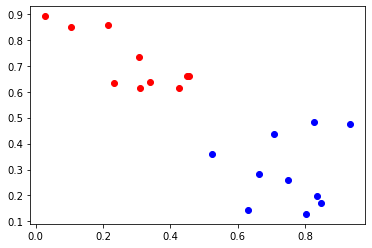

In [5]:
for elem in l:
    if elem[1] == 0:
        plt.scatter(elem[0][0], elem[0][1], color="red")
    else:
        plt.scatter(elem[0][0], elem[0][1], color="blue")
        
plt.show()

____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Zähle wie viele Punkte das Perzeptron richtig klassifiziert. Benutze dabei die Funktion aus Aufgabe 1.</i>

In [6]:
correct = 0
count = 0
for elem in l:
    if perzeptron(elem[0][0], elem[0][1]) == elem[1]:
        correct += 1
    count += 1
print(f"{correct}/{count}")

10/20


<h3>Geometrische Betrachtung</h3>

In diesem Abschnitt betrachten wir die geometrische Sichtweise des Perzeptrons in einem zweidimensionalen Koordinatensystem. Zur besseren Veranschaulichung nehmen wir in den folgenden Abschnitten an, dass $b = 0$ ist. Demzufolge ist der Output des Perzeptrons $f(w_1 \cdot x + w_2 \cdot y)$. Bei $f$ handelt es sich, um die Treppenfunktion, d.h. wenn der Input kleiner oder gleich 0 ist, ist die Ausgabe von $f$ gleich $0$, und wenn der Input größer als $0$ ist, ist die Ausgabe von $f$ gleich $1$. 

____

<i style="font-size:38px">?</i>

<i>Hast du eine Idee, wie diese Fallunterscheidung im Koordinatensystem geometrisch aussieht? Betrachte hierfür die Treppenfunktion und deren Eingabe. An was errinert dich das? <br> Tipp: Setze für $w_1$ und $w_2$ konktrete Werte ein, um dir den Sachverhalt besser zu veranschaulichen.</i>

&nbsp;
<details>
<summary>➤ Klick hier, um deine Antwort zu prüfen.</summary>

Wenn $w_1 \cdot x_1 + w_2 \cdot x_2 \leq 0$, dann wird dem Punkt $(x_1, x_2)$ die Ausgabe 0 zugewiesen; wenn $w_1 \cdot x_1 + w_2 \cdot x_2 > 0$, dann die Ausgabe $1$. Durch die Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$ wird also eine Entscheidungsgrenze beschrieben. Alle Punkte, die auf dieser Grenze liegen, gehören „gerade noch so” der Klasse $0$ an. Wenn ein Punkt auf der einen Seite der Geraden liegt, so wird ihm $0$ als Ausgabe zugewiesen; wenn ein Punkt auf der anderen Seite der Geraden liegt, so wird ihm $1$ zugewiesen. <br>
Du kannst die Gleichung auch nach $x_2$ umstellen, sodass du die gewohnte Form einer Geradengleichung erhälst, die du aus der Schule kennst: $$x_2 = - \frac{w_1}{w_2} x_1 + 0.$$ <br><br>
    
Alternativ kannst du die „Entscheidungsgerade”, die durch die Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$ beschrieben wird, auch so konstruieren, indem du Punkte wählst, deren Skalarprodukt mit dem Gewichtsvektor $\vec{w} = \begin{pmatrix} w_1 \\ w2 \end{pmatrix}$ gleich $0$ ist.
    
&nbsp;


 <figure>
  <img src="img/vector.png" alt="weight vector" style="width:30%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Für die Gleichung $- x_1 + 2 x_2 = 0$ ist der Gewichtsvektor $\vec{w} = \begin{pmatrix} -1 \\ 2 \end{pmatrix}$ (in schwarz abgebildet). Interpretiert man die Punkte auf der blauen Gerade $x_2 = \frac{1}{2} \cdot x_1 + 0$ als Vektoren, so stehen all diese Vektoren senkrecht auf dem Gewichtsvektor, d.h. das Skalarproduk ist gleich $0$. <br><br>
    
Zusatzfrage: Was ändert sich, wenn b $\neq$ 0?
    
</details>

<h3>Update der Gewichte</h3>

Im letzten Abschnitt haben wir die geometrische Bedeutung der Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$ kennen gelernt. In diesem Abschnitt finden wir heraus, wie wir die Gewichte anpassen, wenn das Perzeptron Punkte falsch klassifiziert.

____

<i style="font-size:38px">?</i>

&nbsp;

<details>
    
<summary>➤ Klick hier, um die Frage anzuzeigen.</summary>
    
<i>Der Punkt P $(-2, 0)$ wird vom Perzeptron falsch, der Punkt Q $(-1,1)$ wird dagegen richtig klassifiziert. Wie muss die Gerade (bzw. der <b>Gewichtsvektor</b>) angepasst werden, damit beide Punkte richtig klassifiziert werden? Beziehe in dein Update den Vektor $\vec{p} = \begin{pmatrix} -2 \\ 0 \end{pmatrix}$ mit ein.</i>
    
&nbsp;


 <figure>
  <img src="img/vector2.png" alt="weight vector" style="width:30%">
  <figcaption></figcaption>
</figure> 

&nbsp;
    
    
<details>

<summary>➤ Klicke hier, um die Lösung anzuzeigen.</summary>
    
Das Perzeptron klassifiziert die Punkte richtig, wenn die Entscheidungsgrenze zwischen den beiden Punkten $P$ und $Q$ verläuft. Das erreichts du, indem du einen neuen Gewichtsvektor wie folgt konstruierst: ursprünglicher Gewichtsvektor plus bisschen mehr als die Hälfte des Vektor $\vec{p} = \begin{pmatrix} -2 \\ 0 \end{pmatrix}$. 
    
&nbsp;


 <figure>
  <img src="img/vector3.png" alt="weight vector" style="width:30%">
  <figcaption></figcaption>
</figure> 

&nbsp;
    
</details>

</details>





____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Setze nun folgende Formeln zur Gewichtsanpassung als Funktion in Code um.</i>

$$w_i^{\text{neu}} = w_i^{\text{alt}} + 0.5 \cdot (t - o) \cdot x_i$$

$$b^{\text{neu}} = b^{\text{alt}} + 0.5 \cdot (t - o)$$

In [14]:
eta = 0.1

def train(x1, x2, label):
    global w1, w2, b
    t = perzeptron(x1, x2)
    error = (t - label)
    w1 = w1 - eta * error * x1
    w2 = w2 - eta * error * x2 
    b = b - eta * error

Nun sind wir bereit, unser Perzeptron zu <b>trainieren</b>. d.h. die Gewichte allmählich an unsere Datenpunkte anzupassen. Wir geben dem Perzeptron jeden Datenpunkt als Input und überprüfen, ob das Perzeptron den Datenpunkt richtig klassifiziert. Wenn das nicht der Fall ist, rufen wir unsere Funktion auf, die wir gerade implementiert haben, um die Gewichte anzupassen. Der Durchlauf aller Datenpunkte durch das Perzeptron wird als <b>Epoche</b> bezeichnet. 

____

<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Du hast bereits einen Datensatz weiter oben erzeugt. Trainiere das Perzeptron solange, bis es jeden Punkt richtig klassifiziert (maximal aber drei Epochen lang). Zeichne jedes Mal nach dem sich der Gewichtsvektor $\vec{w}$ ändert ein Schaubild mit den Punkten und der Entscheidungsgerade ein. Färbe die Punkte auf der einen Seite der Geraden in einer anderen Farbe ein, wie die Punkte auf der anderen Seite der Geraden.</i>

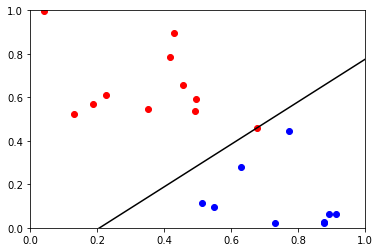

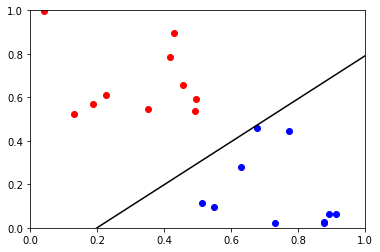

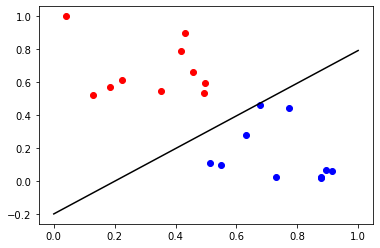

In [17]:
w1 = random.uniform(-1,1)
w2 = random.uniform(-1,1)
b = random.uniform(-1,1)

for _ in range(100):
    error_total = 0
    for elem in l:
        
        plt.clf()
        x1 = elem[0][0]
        x2 = elem[0][1]
        label = elem[1]
        
        error = label - perzeptron(x1, x2)
        
        if w2 != 0:
            m = -w1 / w2
            c = -b / w2 
            x = np.linspace(0,1,100)
            y = m * x + c
            plt.plot(x, y, color="black")
            for element in l: 
                if w1 * element[0][0] + w2 * element[0][1] + b <= 0:
                    plt.scatter(element[0][0], element[0][1], color="red")
                else: 
                    plt.scatter(element[0][0], element[0][1], color="blue")
        else:
            x = -b / w1 
            plt.axvline(x = x, color="black")
            for element in l:
                if w1 * element[0][0] + b <= 0: 
                    plt.scatter(element[0][0], element[0][1], color="red")
                else: 
                    plt.scatter(element[0][0], element[0][1], color="blue")
        
        if error != 0:
            train(x1, x2, label)
            error_total += 1
            
    if error_total == 0:
        break
    
    plt.xlim(0,1)
    plt.ylim(0,1)        
    plt.show()

<h3>Grenzen des Perzeptrons</h3>
    
____

<i style="font-size:38px">?</i>

    
<i>Die Möglichkeiten mit dem Perzeptron Daten zu klassifizieren sind begrenzt. Hast du eine Idee, warum das so ist? Klicke die unterschiedlichen Lösungen an.</i>

&nbsp;

<details>
    
<summary>➤ 1. Nachteil</summary>
   
Das Perzeptron kann nur zwei Klassen von Datenpunkten durch eine Entscheiungsgerade voneinander trennen. Wenn der Datensatz mehr als zwei Klassen hat, ist das Perzeptron nicht in der Lage alle Datenpunkte richtig zu klassifizieren, da es nur $0$ oder $1$ als Ausgabe ausgibt.
   
</details>

&nbsp;

<details>
    
<summary>➤ 2. Nachteil</summary>
   
Wenn die Daten nicht durch eine Gerade getrennt werden können, so wird das Perzeptron nie in der Lage sein, alle Daten richtig zu klassifizieren. Probiere es selbst aus! Erzeuge einen Datensatz mit zwei Klassen, die nicht durch eine Gerade getrennt werden können und beobachte was passiert.
   
</details>

&nbsp;

<details>
    
<summary>➤ 3. Nachteil</summary>
   
Der Lernalgorithmus des Perzeptrons ist nicht optimal.
   
</details>

Im nächsten Abschnitt lernst du eine Erweiterung des Perzeptrons kennen, die die Nachteile des Perzeptrons versucht anzugehen: das neuronale Netz. 

____

<i style="font-size:38px">?</i>

    
<i>Wir haben gelernt, wie wir das Perzeptron trainieren können. Doch warum haben wir das eigentlich gemacht?</i>

&nbsp;

<details>
    
<summary>➤ Klicke hier, um deine Antwort zu prüfen.</summary>
   
Wir möchten das Perzeptron so trainieren, dass wir <b>unbekannte</b> Daten, auf denen wir unser Perzeptron <b>nicht</b> trainiert haben, richtig klassifizieren. Die Performance auf den <b>Trainingsdaten</b> dient zwar als Orientierung, ist aber nicht besonders wichtig.
   
</details>

<h3>Nur für Lehrende</h3>

Code zur Erzeugung des Schaubilds.

In [ ]:
plt.axis('scaled')
plt.quiver([0, 0, 0], [0, 0, 0], [-1], [2], angles='xy', scale_units='xy', scale=1, color="lightgrey")
plt.quiver([0, 0, 0], [0, 0, 0], [-2], [0], angles='xy', scale_units='xy', scale=1, color="red")
plt.quiver([0, 0, 0], [0, 0, 0], [-1], [1], angles='xy', scale_units='xy', scale=1, color="green")
plt.quiver([-1], [2], [1.5], [0], angles='xy', scale_units='xy', scale=1, linestyle='--', color="lightgrey")
plt.quiver([0], [0], [.5], [2], angles='xy', scale_units='xy', scale=1, linestyle='--', color="black")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter([-2], [0], color="red")
plt.scatter([-1], [1], color="green")
x = np.linspace(-3,3,100)
y = -0.25 * x
plt.plot(x,y)
plt.show()